<a href="https://colab.research.google.com/github/Jescas981/Deep-Learning-TF2/blob/main/00_MachineLearning_and_Neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What's Machine Learning?
People might look Machine Learning as something **magical, complex, fancy** and futuristic. It is almost all of them, but it's not **magical** at all. It requires a background math and spatial reasoning to understand how a model works

Common Answer: Machine Learning can be expressed as automating and improving the learning process of computers based on their experience without any human assitance.

Dumb Answer (But it's definition is more exact): The answer above doesn't tell us how Machine Learning works, it just say common stuffs that we can search on internet. Machine Learning involves spacial reasoning because it is just be a  a geometrical problem.

## 1. Linear Regression Problem

### 1.1 Linear Regression
Let's think that we want to know how a salary is related to years of experience, we can use a line to fit the data.

\begin{align}
y = wx + b
\end{align}

Where:
+ $y$ : Target
+ $w$: Weight (Slope)
+ $b$: Bias

To fit the data we need to calculate the parameters $w$ and $b$ to modify our model predictions.

**How we can do this in the real world?**
We need to follow these steps:
+ Collect bunch of data $(x_1,y_1)...(x_n,y_n)$
+ Draw all points as dots in their corresponding coordinates
+ Draw a line through the dots

The last step defines what Machine Learning does, we create a model that fits data using a geometrical approach.

**Note**: This data is not real, is only for learning purposes

In [626]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [627]:
# Paramaters
weight = 1.5
bias = 1.25

# Fake linear data
X = np.arange(start=0,
              stop=20,
              step=0.1)

# Calculate predictions
np.random.seed(43)
y = weight * X + bias + np.random.random(len(X)) * 8 # Noise

linear_df = pd.DataFrame({'Years': X,
                          'Salary': y})
linear_df.head(10)

,Years,Salary
0,0.0,2.170437
1,0.1,6.272532
2,0.2,2.617128
3,0.3,3.624717
4,0.4,4.467112
5,0.5,8.873100
6,0.6,7.478722
7,0.7,6.629298
8,0.8,2.682111
9,0.9,8.469986


Text(0, 0.5, 'Salary (K USD)')

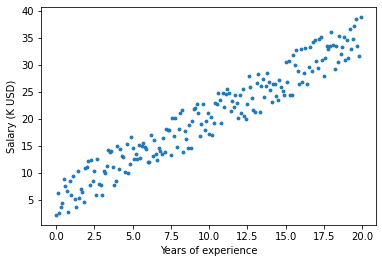

In [628]:
plt.scatter(X,y,s=8)
plt.xlabel('Years of experience')
plt.ylabel('Salary (K USD)')

### 1.2 Multiple Linear Regression
It's similar to a  simple Linear Regression, except the it involves more input feaetures like:
+ Years of experience
+ Phd
+ Bachelors
+ Age
+ School
When we have more input features in our model, it could improve our model predictions. In this example the Phd, Bachelor, School can affect the Salary of a person.

If we have more than two features we won't be able to visualize at all our model because we can't visualize up to the third dimension.

**Note**: This data is not real, is only for learning purposes

In [629]:
# Paramaters
weight1 = 1.5
bias1 = 1.25

weight2 = 0.3
bias2 = 20

# Fake linear data
X1 = np.arange(start=0,
              stop=20,
              step=0.1) +  + np.random.random(200) * 8

X2 = np.arange(start=20,
              stop=60,
              step=0.2) +  + np.random.random(200) * 10

np.random.seed(43)

# Calculate predictions
y = (weight1 * X1 + bias1) +(weight2 * X2 + bias2)

linear_df = pd.DataFrame({'Years': X1,
                          'Age': X2,
                          'Salary': y})
linear_df.head(10)

,Years,Age,Salary
0,7.914428,21.640316,39.613736
1,7.452617,28.626721,41.016941
2,7.003886,28.181038,40.210140
3,4.249542,26.228000,35.492713
4,4.148932,29.928311,36.451892
5,4.971622,30.157684,37.754739
6,1.455218,29.722659,32.349624
7,7.889897,23.005638,39.986537
8,5.721178,24.887612,37.298050
9,8.836367,26.689339,42.511352


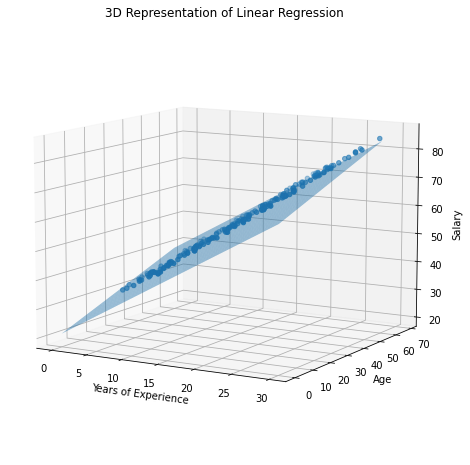

In [630]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X1,X2,y)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
ax.view_init(10,-60)
ax.set_title('3D Representation of Linear Regression')
# # Draw plane
xx, yy = np.meshgrid(np.linspace(0,30), np.linspace(0,60))
zz = (weight1 * xx + bias1) + (weight2 * yy + bias2)
ax.plot_surface(xx ,yy ,zz ,alpha=0.5)

## 2. Binary Classification
Binary Classification consists into classify if multiple input features belongs a to class or another one.

The output of this type of model is binary only 0 or 1. 

Eg. Dog vs Cat, Spam vs Not Spam, etc

In [631]:
np.random.seed(40)

X1 = np.arange(start=4, stop=6, step=0.05) + np.random.randn(40)
X1 = np.expand_dims(X1[::-1],axis=1)
X2 = np.expand_dims(np.arange(start=150, stop=310, step=4) + np.random.randn(40) * 5 ,axis=1)
length = int(len(X1)/2)
Y = np.expand_dims(np.concatenate([np.ones(length), np.zeros(length)]),axis=1)

data = np.hstack([X1,X2,Y])

# Reproducible random
np.random.seed(43)

# Move data randomly
np.random.shuffle(data)

X1 = data[:,0]
X2 = data[:,1]
Y = data[:,2]

bin_class_df = pd.DataFrame({'Height': X1,
                             'Weight': X2,
                             'At risk?': Y})
bin_class_df.head(10)

,Height,Weight,At risk?
0,5.293494,223.366989,1.0
1,6.850679,196.460424,1.0
2,4.616307,254.438936,0.0
3,5.110267,275.017609,0.0
4,4.753830,181.205514,1.0
5,5.216571,174.044947,1.0
6,2.355599,290.862745,0.0
7,5.527712,189.481388,1.0
8,3.675016,232.714408,0.0
9,3.415394,297.642650,0.0


We use a line to separate and classify the data

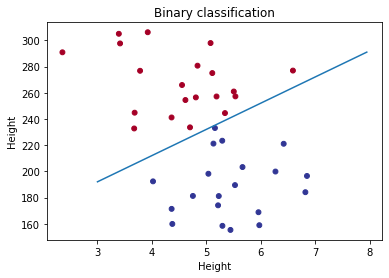

In [632]:
plt.scatter(X1, X2, c=Y, s=24, cmap=plt.cm.RdYlBu)
plt.title('Binary classification')
plt.xlabel('Height')
plt.ylabel('Height')
X_line = np.arange(3, 8, 0.05)
Y_line = X_line * 20 + 132
plt.plot(X_line, Y_line)

## Importan Rule: All data is the same
This rule says that the data can change, but the task remains the same.
The task is:
- Collect bunch of data
- Draw data points
- Draw a line to split data

## Sumary:
+ All data is the same
+ Take the magic away of Machine Learning
+ Machine Learning can be interpreted as a geometrical problem
+ Linear regression predicts data points through a line that fits data
+ Classification separate data points through a line

# Linear classification
**Q:** How we can use a line to classify data?

**A:** That's a good question, we can use a line to give us an output that we can interpret:
\begin{align}
a = w_1 x_1 + w_2 x_2 + b
\end{align}

Then we can evaluate the outputs with a decision rule.
\begin{align}
y =  
\begin{cases}
1& a\ge 0 \\
0& a\lt0  \\
\end{cases}
\end{align}

We have to take in account that output $a$ could be in a range $[-\infty ; \infty]$ because it's linear, we need a way to move all zero targets to $-\infty$ and the one targets to $\infty$, so $a$ allows us to get a decision function that gives us an output that with a decision rule (threshold) we can decide whether a target could be one or zero. The decision boundary (line the separates our data) is a result of $a$ decision function, for example:

**Decision Function:**
\begin{align}
a = w_1 x_1 + w_2 x_2 + b
\end{align}

**Decision boundary:**

Let's replace 

$w_1= 1; \\ w_2=-w_1$ .
\begin{align}
y = (x_1 - x_2) + b
\end{align}
In the equation above we can see an example of how a line classifies our data. 

<center><img src="https://github.com/Jescas981/Deep-Learning-TF2/blob/main/images/00-line-classifier.PNG?raw=true" width=400></center>

## 1.Classification with different activation functions

In [633]:
# Generate fake dataset
n_samples = 100
error = 2
np.random.seed(43)
noise = np.random.randn(n_samples) * error
# Input features
X1 = np.linspace(start=0, stop=4, num=n_samples)
X2 = np.zeros(n_samples) + noise
# Output
Y = np.zeros(n_samples)
Y[-2*X1+4 > X2] = 1
Y[X2-4 > 2*X1] = 1

def lin_fn(x1, x2):
  w1 = -2
  w2 = -1
  b = 4
  return w1 * x1 + w2 * x2 + b

# Create plot functions
def plot_decision_boundary(activation_fn=None, plane_resolution=50, lvl_contour = 1e-6):
  X = np.hstack([X1.reshape(-1,1), X2.reshape(-1,1)])

  # Hyper-plane
  xx, yy = np.meshgrid(np.linspace(start=X[:,0].min(), stop=X[:,0].max(), num=plane_resolution),
                       np.linspace(start=X[:,1].min(), stop=X[:,1].max(), num=plane_resolution))
  
  zz = lin_fn(xx,yy)
  if activation_fn is not None:
    zz = activation_fn(zz)

  # Decision function
  fig = plt.figure(figsize=(12,6))
  ax = fig.add_subplot(121,projection='3d')
  ax.plot_surface(xx,yy,zz,alpha=0.3)
  ax.contour(xx, yy, zz, levels=[lvl_contour]) # It's not zero to avoid errors
  ax.scatter(X[:,0], X[:,1], c=Y)
  ax.set_title('Decision Function')
  ax.set_xlabel('Exam 1 Score')
  ax.set_ylabel('Exam 2 Score')
  ax.set_zlabel('Output')

  # Decision boundary
  ax1 = fig.add_subplot(122)
  ax1.scatter(X[:,0], X[:,1], c=Y, s=16)
  ax1.contour(xx, yy, zz, levels=[lvl_contour])
  ax1.set_title('Decision Boundary')
  ax1.set_xlabel('Exam 1 Score')
  ax1.set_ylabel('Exam 2 Score')

  fig.tight_layout(pad=2.5)

def model_accuracy(y_pred, y_true):
  return np.sum(y_pred==y_true)/len(Y)*100

### 1.1 No activation function

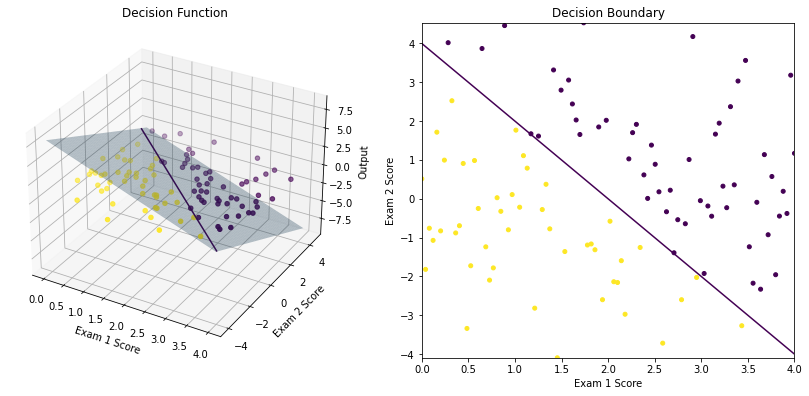

In [634]:
# Decision function
plot_decision_boundary() # Ignore activation function

In [635]:
# Evaluate linear function
a = lin_fn(X1,X2)
a[a>=0] = 1
a[a<0] = 0
# Verify model accuracy
acc = model_accuracy(a,Y)
print(f"Accuracy with Linear Function: {acc:.2f}%")

Accuracy with Linear Function: 100.00%


### 1.2 Step function

We can see in the output above that our model fits the data, but our output's range is too big, wouldn't be better to have a output with smaller range?

Let's try to use a step function as an activation function $z(a)$ to our linear output that we used above.

\begin{align}
a = w_1 x_1 + w_2 x_2 + b \\
z(a) = \begin{cases}
1& a\ge 0 \\
0& a\lt0  \\
\end{cases} \\
y =  z(a)
\end{align}



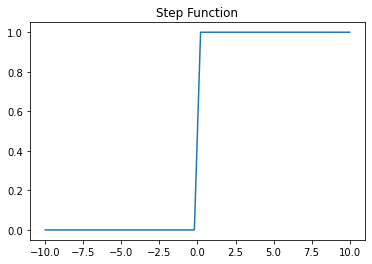

In [636]:
def step_fn(x):
  z = np.zeros_like(x)
  z[x>=0] = 1
  z[x<0] = 0
  return z

# Plot step function
x_step = np.linspace(-10,10)
y_step = step_fn(x_step)
plt.title('Step Function')
plt.plot(x_step, y_step)

We can see that a step function is similar to our previous decision rule, but in this case we get the target directly

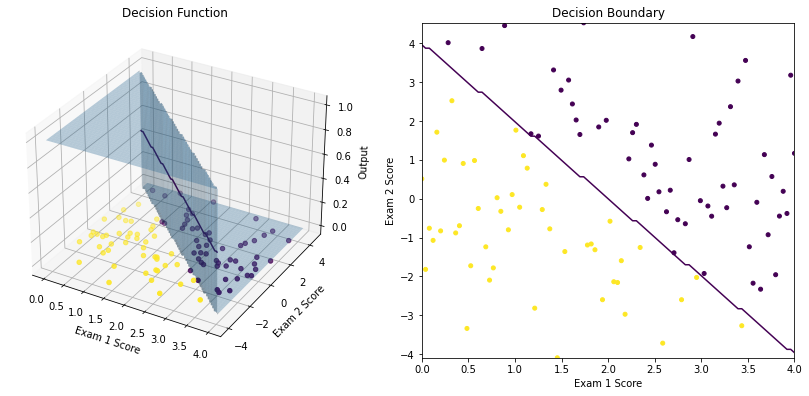

In [637]:
threshold = 0.5
plot_decision_boundary(activation_fn=step_fn, plane_resolution=100, lvl_contour=threshold)

In [638]:
# Evaluate linear function
z = step_fn(lin_fn(X1,X2))
# Verify model accuracy
acc = model_accuracy(z,Y)
print(f"Accuracy with Step Function: {acc:.2f}%")

Accuracy with Step Function: 100.00%


### 1.3 Sigmoid function
The step activation function works fine for this classification task, but we need a smoother activation function in the range of $[0-1]$, we want our function to be smoother because its stability, continuity and generalization.

\begin{align}
a = w_1 x_1 + w_2 x_2 + b \\
z(a) = \frac{1}{1+e^{-x}} \\
y = 
\begin{cases}
1 & z\ge 0.01\\
0 & z\lt 0.01
\end{cases}
\end{align}

**Note:**
- For larger values the sigmoid function isn't smooth, an option to solve this problem is to normalize our inputs

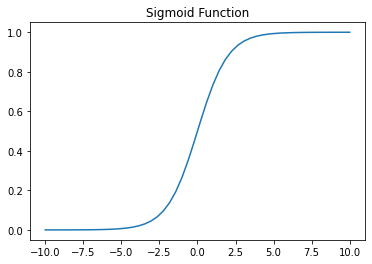

In [639]:
def sigmoid_fn(x):
  return 1/(1+np.exp(-x))

# Plot step function
x_sigm= np.linspace(-10,10)
y_sigm= sigmoid_fn(x_sigm)
plt.title('Sigmoid Function')
plt.plot(x_sigm, y_sigm)

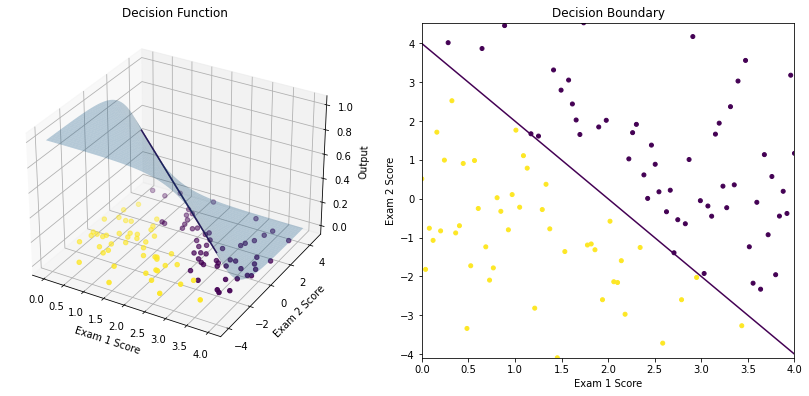

In [640]:
threshold = 0.5
plot_decision_boundary(activation_fn=sigmoid_fn, plane_resolution=200, lvl_contour=threshold)

In [641]:
# Evaluate linear function
a = sigmoid_fn(lin_fn(X1,X2))
z = np.round(z) # Treshold 0.5 by default
# Verify model accuracy
acc = model_accuracy(z,Y)
print(f"Accuracy with Sigmoid Function: {acc:.2f}%")

Accuracy with Sigmoid Function: 100.00%


### 1.4 ReLU function
The sigmoid function is a good activation function but it has a drawback, it we use too much layers with sigmoid activations, we will have a vanish gradient problems so our weights won't update because it's gradients are too small. A way to prevent this is too use a ReLU activation function.


\begin{align}
a = w_1 x_1 + w_2 x_2 + b \\
z(a) = maximum(a,0) \\
y = 
\begin{cases}
1 & z\ge 0.5\\
0 & z\lt 0.5
\end{cases}
\end{align}



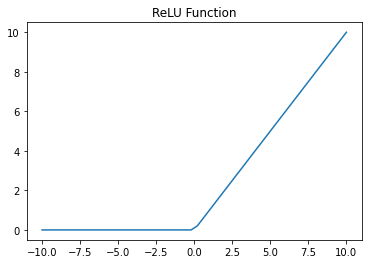

In [642]:
def relu_fn(x):
  return np.maximum(x,0)

# Plot ReLU function
x_relu= np.linspace(-10,10)
y_relu= relu_fn(x_relu)
plt.title('ReLU Function')
plt.plot(x_relu, y_relu)

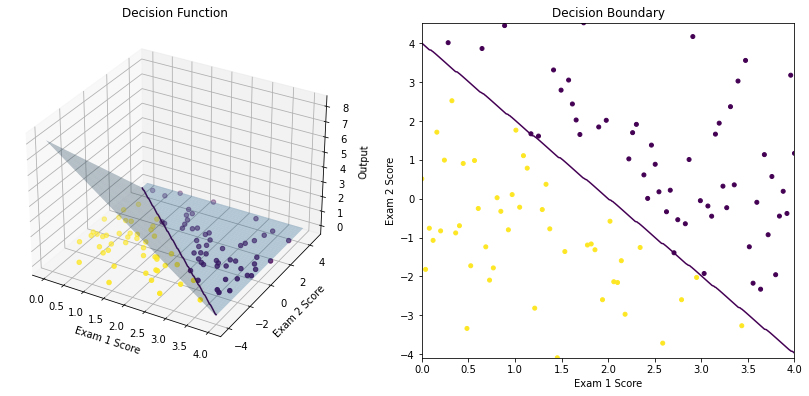

In [643]:
threshold = 1e-3
plot_decision_boundary(activation_fn=relu_fn, plane_resolution=200, lvl_contour=threshold)

### 1.4 Tanh function
Another activation function that works fine for this task is $tanh$ because its range is [-1 to 1], this function helps our data to be simmetric

\begin{align}
a = w_1 x_1 + w_2 x_2 + b \\
z(a) = tanh(a) \\
y = 
\begin{cases}
1 & z\ge 0\\
0 & z\lt 0
\end{cases}
\end{align}

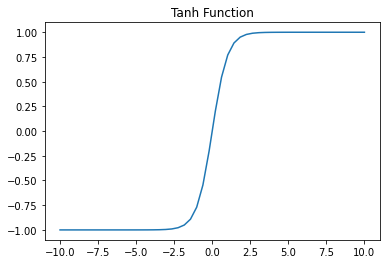

In [644]:
def tanh_fn(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

# Plot ReLU function
x_tanh= np.linspace(-10,10)
y_tanh= tanh_fn(x_tanh)
plt.title('Tanh Function')
plt.plot(x_tanh, y_tanh)

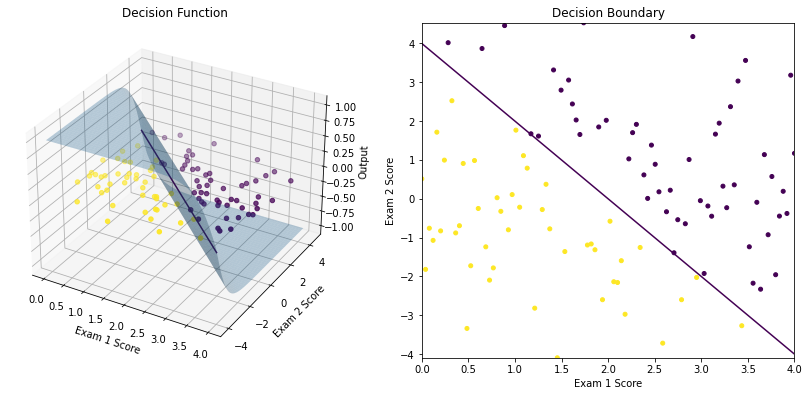

In [645]:
threshold = 0
plot_decision_boundary(activation_fn=tanh_fn, plane_resolution=200, lvl_contour=threshold)